# 5. La classification hiérarchique ascendante et le K-Means selon le revenu médian

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
data_communes = pd.read_csv(".../Inegalites2018_IDFCommunes.xlsx")
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,Part Pop 15 ans ou plus Enseignement sup,Taux d'emploi 15-64 ans,Taux de chômage 15-64 ans,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration
0,95633,11,95,"49,00049673","2,486429562",Vaudherland,22980,0.254,0.090,0.388,...,0.104,0.761,0.121,0.000,0.100,0.000,0.200,0.400,0.300,0.081
1,77009,11,77,"48,18127559","2,55657978",Arville,27820,0.192,0.040,0.313,...,0.253,0.731,0.066,0.000,0.000,0.111,0.444,0.333,0.111,0.000
2,77134,11,77,"48,64252262","3,28982875",Courchamp,23400,0.132,0.113,0.245,...,0.274,0.742,0.083,0.000,0.000,0.273,0.091,0.545,0.091,0.048
3,77271,11,77,"48,18279297","2,621229709",Maisoncelles-en-Gâtinais,21690,0.290,0.060,0.290,...,0.170,0.744,0.065,0.000,0.000,0.000,0.556,0.222,0.222,0.082
4,95110,11,95,"49,13955373","1,943521002",Brignancourt,28900,0.117,0.019,0.195,...,0.461,0.700,0.052,0.000,0.000,0.375,0.375,0.188,0.063,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95304,11,95,"49,15849636","2,177680345",Hédouville,34290,0.051,0.051,0.194,...,0.498,0.688,0.049,0.000,0.056,0.389,0.389,0.167,0.000,0.043
1267,95308,11,95,"49,10489391","2,127220469",Hérouville-en-Vexin,30150,0.126,0.042,0.251,...,0.377,0.722,0.069,0.015,0.061,0.242,0.364,0.197,0.121,0.038
1268,95447,11,95,"49,17378477","1,980231533",Neuilly-en-Vexin,27530,0.147,0.064,0.192,...,0.340,0.760,0.083,0.000,0.150,0.300,0.200,0.300,0.050,0.027
1269,95459,11,95,"49,15953932","1,856434093",Nucourt,26580,0.212,0.040,0.280,...,0.296,0.707,0.086,0.030,0.030,0.269,0.284,0.207,0.180,0.035


In [ ]:
#Copier le DataSet
communes_socioeco = data_communes.copy()

#Accéder aux colonnes du DataSet
communes_socioeco.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration'],
      dtype='object')

In [ ]:
#Les librairies pour le clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [ ]:
revenu = communes_socioeco["Médiane (€)"]
data_rev = pd.DataFrame({"Revenu annuel par ménage médian":revenu}).set_index(communes_socioeco['Code géographique'])
data_rev

,Revenu annuel par ménage médian
Code géographique,
95633,22980
77009,27820
77134,23400
77271,21690
95110,28900
...,...
95304,34290
95308,30150
95447,27530


In [ ]:
data_rev.describe()

,Revenu annuel par ménage médian
count,1271.000000
mean,27240.723839
std,5556.563724
min,10580.000000
25%,24020.000000
50%,26850.000000
75%,29980.000000
max,52670.000000


In [ ]:
#Convertir la variable "Médiane" en vecteur
revenu = np.array(revenu)
revenu=revenu.reshape(-1,1)
revenu

array([[22980],
       [27820],
       [23400],
       ...,
       [27530],
       [26580],
       [26220]], dtype=int64)

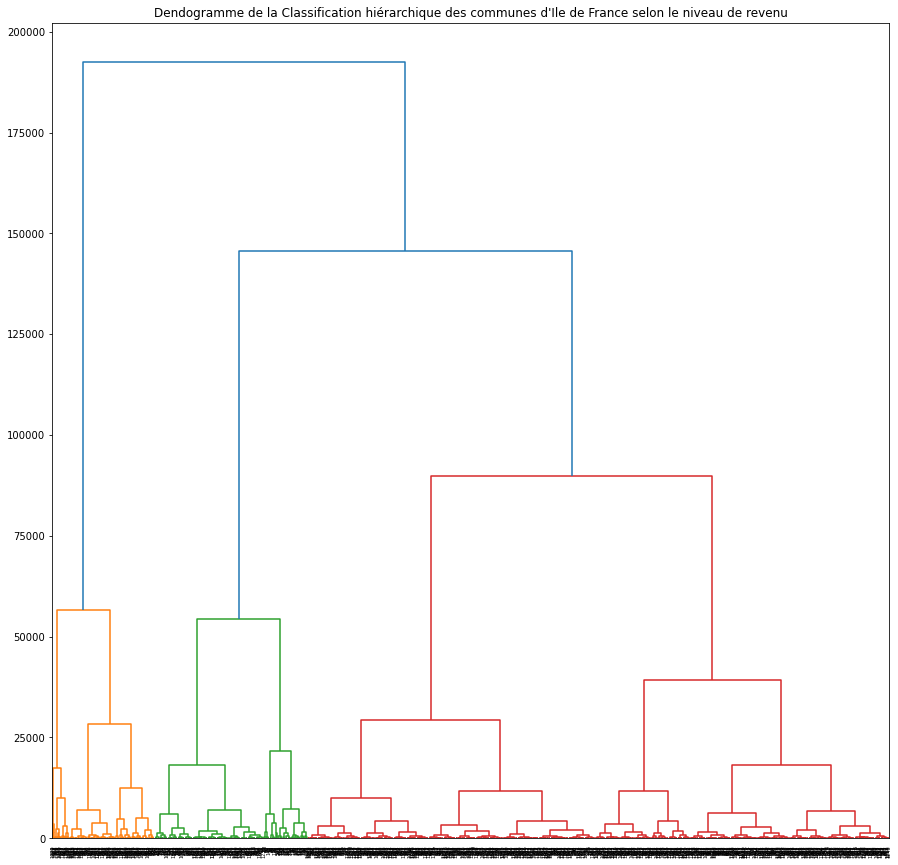

In [ ]:
#Mise en place de la classification hiérarchique ascendante du niveau d'immigration
Z = sch.linkage(revenu,method='ward',metric='euclidean')

#Afficher le dendrogramme
plt.figure(figsize=(15,15))
plt.title("Dendogramme de la Classification hiérarchique des communes d'Ile de France selon le niveau de revenu")
dendrogram = sch.dendrogram(sch.linkage(revenu, method  = "ward"))
plt.show()

Text(0.5, 1.0, 'K-Means par la méthode du PCA')

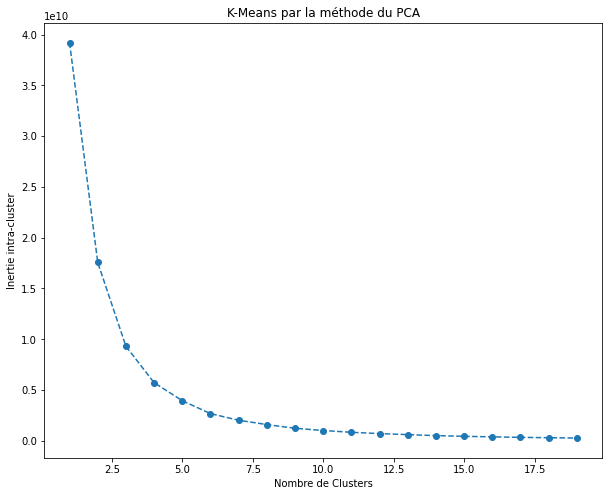

In [ ]:
#Courbe de l'inertie intra-cluster pour le K-Means
inertie_intra = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans_pca.fit(revenu)
    inertie_intra.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),inertie_intra, marker='o',linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('K-Means par la méthode du PCA')

En utilisant la méthode du coude, on peut former seulement 3 clusters par rapport au niveau de revenu : faible, modéré et elevé.

In [ ]:
#Nuage des individus avec les 3 strates
kmeans_pca_rev = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans_pca_rev.fit(revenu)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#Créer les nouvelles colonnes dans le DataFrame
data_rev['Numéro de cluster']=kmeans_pca_rev.labels_
data_rev

,Revenu annuel par ménage médian,Numéro de cluster
Code géographique,,
95633,22980,0
77009,27820,2
77134,23400,0
77271,21690,0
95110,28900,2
...,...,...
95304,34290,1
95308,30150,2
95447,27530,2


In [ ]:
#Traduire les numéros de clusters
data_rev["Niveau de revenu"]=data_rev["Numéro de cluster"].map({0:'Faible',2:'Modéré',1:'Elevé'})
data_rev

,Revenu annuel par ménage médian,Numéro de cluster,Niveau de revenu
Code géographique,,,
95633,22980,0,Faible
77009,27820,2,Modéré
77134,23400,0,Faible
77271,21690,0,Faible
95110,28900,2,Modéré
...,...,...,...
95304,34290,1,Elevé
95308,30150,2,Modéré
95447,27530,2,Modéré


C:\Users\almou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


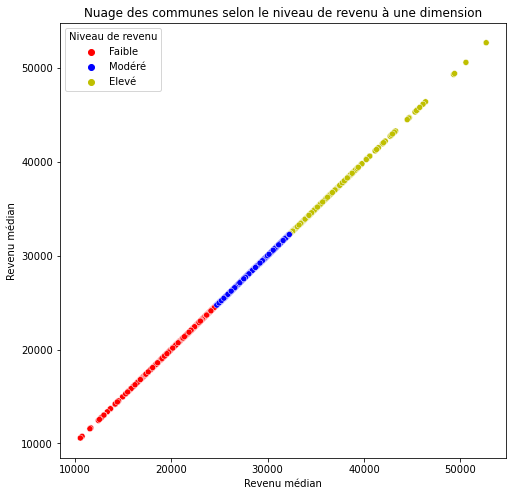

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
sns.scatterplot(data_rev.iloc[:,0],data_rev.iloc[:,0], hue = data_rev["Niveau de revenu"], palette = ['r','b','y'])
plt.title("Nuage des communes selon le niveau de revenu à une dimension")
plt.xlabel("Revenu médian")
plt.ylabel("Revenu médian")
plt.show()

In [ ]:
data_rev.to_excel('.../RevenuCommunes2018IDF.xlsx')